In [29]:
import cv2
import os
import numpy as np
from keras.models import Sequential
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Rescaling, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
TRAINDATADIR = r"../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"
CATEGORIES = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P",
              "Q","R","S","T","U","V","W","X","Y","Z","del","nothing","space"]
IMG_SIZE=64

X = []
y = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(TRAINDATADIR, category) # path to normal or pneumonia dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                image = cv2.resize(cv2.imread(os.path.join(path, img),cv2.IMREAD_COLOR), (64, 64))
                X.append(image)
                y.append(class_num)
            except Exception as e:
                print(e)
                
create_training_data()

print(len(X))
print(len(y))

87000
87000


In [20]:
X = np.array(X)
y = np.array(y)

In [18]:
print("The shape of X is : ", X.shape)
print("The shape of y is : ", y.shape)

The shape of X is :  (87000, 64, 64, 3)
The shape of y is :  (87000,)


In [22]:
from sklearn.utils import shuffle
X, y =shuffle(X,y,random_state=20)

In [26]:
X_train, X_split, y_train, y_splitt = train_test_split(X, y, test_size=0.30, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_split, y_splitt, test_size=0.50, random_state=42)

In [27]:
y_train = to_categorical(y_train,29)
y_test = to_categorical(y_test,29)
y_valid = to_categorical(y_valid,29)

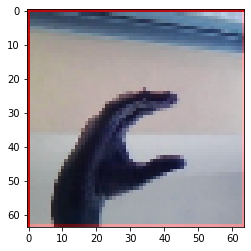

In [30]:
plt.imshow(X_train[200])
plt.show()

In [34]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))


model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
activation_3 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)       

In [35]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [36]:
his=model.fit(X_train, y_train,epochs=50,batch_size=128,verbose=2,validation_data=(X_valid, y_valid),callbacks=[early_stop])
model.save("./ASL.hdf5")
model.save("./ASL.h5")

2022-10-29 23:47:31.268118: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 748339200 exceeds 10% of free system memory.
2022-10-29 23:47:32.246001: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 748339200 exceeds 10% of free system memory.


Epoch 1/50


2022-10-29 23:47:35.202016: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


476/476 - 18s - loss: 2.1454 - accuracy: 0.5011 - precision_1: 0.8342 - recall_1: 0.3755 - val_loss: 0.6756 - val_accuracy: 0.7828 - val_precision_1: 0.8787 - val_recall_1: 0.7089
Epoch 2/50
476/476 - 7s - loss: 0.4033 - accuracy: 0.8687 - precision_1: 0.9231 - recall_1: 0.8221 - val_loss: 0.2994 - val_accuracy: 0.8983 - val_precision_1: 0.9256 - val_recall_1: 0.8723
Epoch 3/50
476/476 - 7s - loss: 0.1806 - accuracy: 0.9390 - precision_1: 0.9532 - recall_1: 0.9262 - val_loss: 0.1505 - val_accuracy: 0.9494 - val_precision_1: 0.9605 - val_recall_1: 0.9384
Epoch 4/50
476/476 - 7s - loss: 0.1155 - accuracy: 0.9614 - precision_1: 0.9679 - recall_1: 0.9556 - val_loss: 0.0935 - val_accuracy: 0.9703 - val_precision_1: 0.9752 - val_recall_1: 0.9661
Epoch 5/50
476/476 - 7s - loss: 0.0894 - accuracy: 0.9711 - precision_1: 0.9745 - recall_1: 0.9674 - val_loss: 0.0726 - val_accuracy: 0.9766 - val_precision_1: 0.9803 - val_recall_1: 0.9738
Epoch 6/50
476/476 - 7s - loss: 0.0832 - accuracy: 0.9726 - 

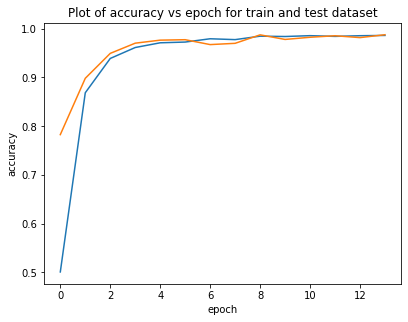

In [37]:
plt.rcParams["figure.figsize"] = [6.4, 4.8]
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

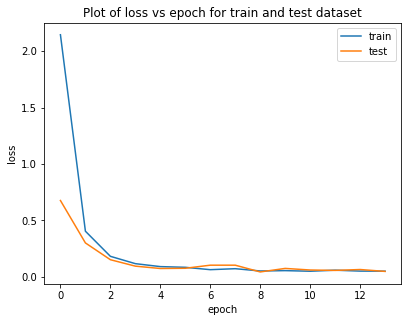

In [38]:
# Plot of loss vs epoch for train and test dataset
plt.rcParams["figure.figsize"] = [6.4, 4.8]
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Model Evaluation

In [39]:
# predicting target attribute on testing dataset
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')
print(f'Test results - Precision: {test_results[2]*100} - Recall: {test_results[3]*100}%')

408/408 [==============================] - 2s 4ms/step - loss: 0.0388 - accuracy: 0.9900 - precision_1: 0.9904 - recall_1: 0.9895
Test results - Loss: 0.038750674575567245 - Accuracy: 98.99616837501526%
Test results - Precision: 99.04126524925232 - Recall: 98.95018935203552%


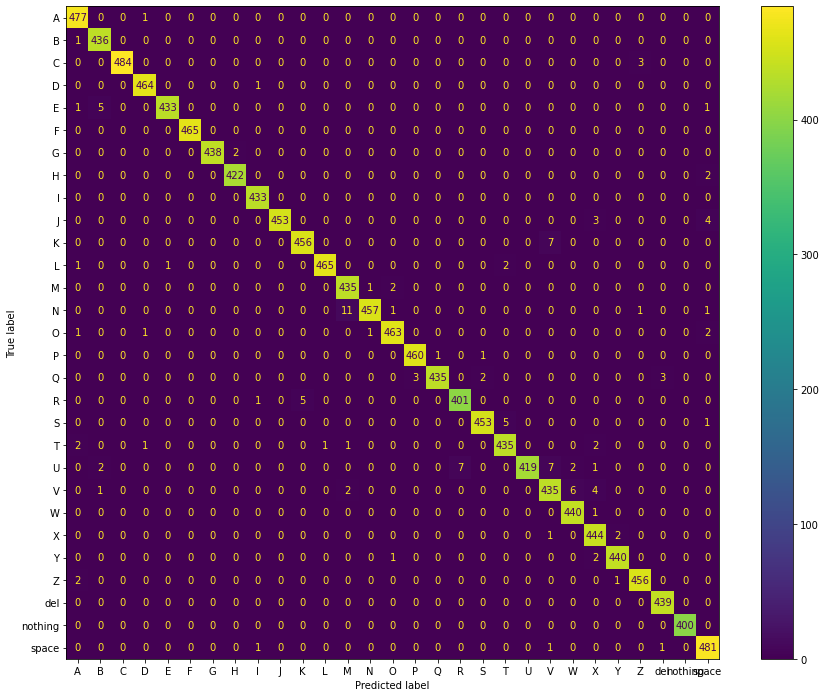

In [45]:
#Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_predictions = model.predict(X_test)
cm=confusion_matrix(y_test.argmax(axis=1),y_predictions.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CATEGORIES)

plt.rcParams["figure.figsize"] = 15, 12
disp.plot()
plt.show()


In [47]:
#Classification Report

from sklearn.metrics import classification_report

report = classification_report(y_test.argmax(axis=1),y_predictions.argmax(axis=1), target_names=CATEGORIES)
print(report)

              precision    recall  f1-score   support

           A       0.98      1.00      0.99       478
           B       0.98      1.00      0.99       437
           C       1.00      0.99      1.00       487
           D       0.99      1.00      1.00       465
           E       1.00      0.98      0.99       440
           F       1.00      1.00      1.00       465
           G       1.00      1.00      1.00       440
           H       1.00      1.00      1.00       424
           I       0.99      1.00      1.00       433
           J       1.00      0.98      0.99       460
           K       0.99      0.98      0.99       463
           L       1.00      0.99      0.99       469
           M       0.97      0.99      0.98       438
           N       1.00      0.97      0.98       471
           O       0.99      0.99      0.99       468
           P       0.99      1.00      0.99       462
           Q       1.00      0.98      0.99       443
           R       0.98    

In [48]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle

n_classes = len(clss)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(clss)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

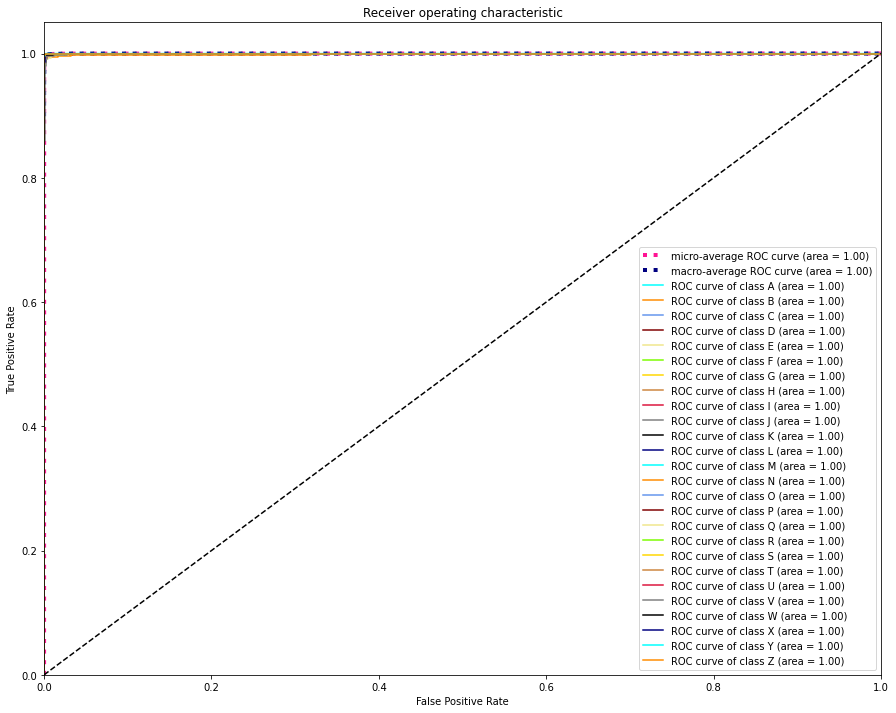

In [49]:
# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "maroon","khaki", "lawngreen", "gold", "peru","crimson", "gray", "black", "navy"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label=f"ROC curve of class {clss[i]} (area = {roc_auc[i]:0.2f})",
    )

plt.rcParams["figure.figsize"] = [10, 8]
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()